In [1]:
%load_ext autoreload
%autoreload 2

import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set_style('whitegrid')

sys.path.append("../")
from utility.ar1 import AR1
from utility.ar import AR

<AxesSubplot: >

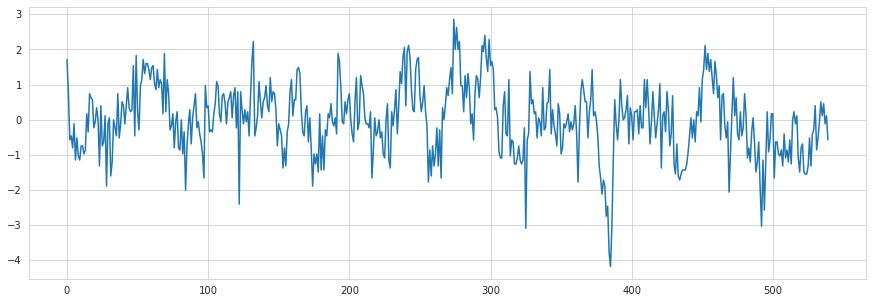

In [2]:
soi = pd.read_table("../data/soi.txt", names=['soi']).soi
soi.plot(figsize=(15, 5))

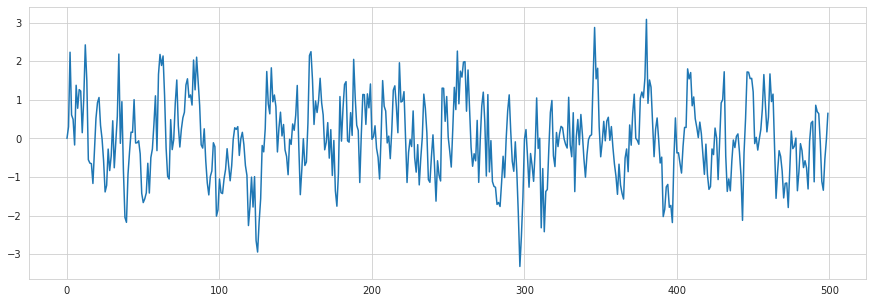

In [131]:
# find the conditional AR(1) parameters
ar1 = AR(lags=1)
ar1.fit(soi)

simulator = AR1(ar1.coeff_[0], var=ar1.var_)
simulator.simulate(x0=0, length=500).plot(figsize=(15, 5))

v_sample = ar1.sample_innovation_var(10000)
b_sample = ar1.sample_coeff(v_sample)
logps = ar1.logp(b_sample, v_sample)

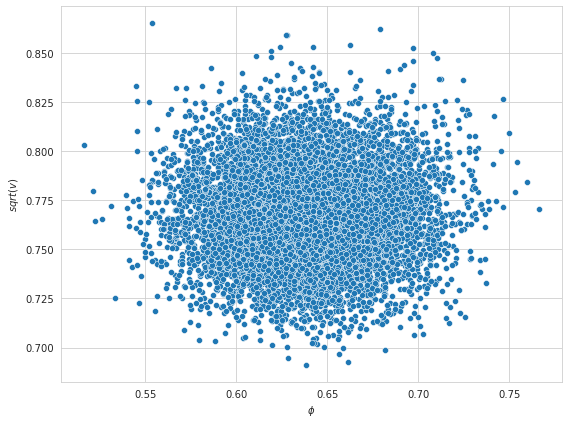

In [132]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(x=b_sample.ravel(), y=np.sqrt(v_sample), ax=ax)

ax.set_ylabel('$sqrt(v)$')
ax.set_xlabel('$\phi$')
fig.tight_layout()
fig.show()

count    10000.000000
mean         0.638743
std          0.033326
min          0.516109
25%          0.616098
50%          0.638438
75%          0.660664
max          0.766278
dtype: float64


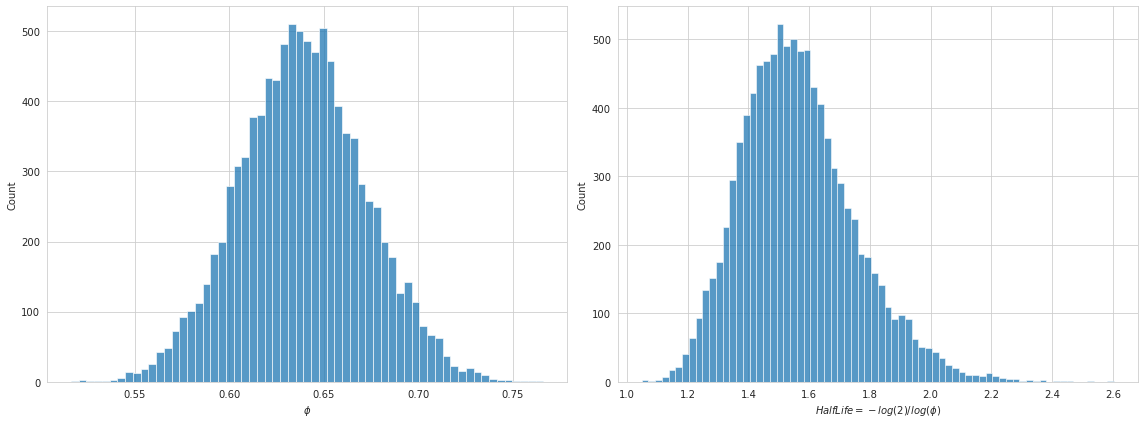

In [133]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.histplot(b_sample.ravel(), ax=ax[0])
sns.histplot(-np.log(2)/np.log(b_sample.ravel()), ax=ax[1])

ax[0].set_xlabel("$\\phi$")
ax[1].set_xlabel("$Half Life = -log(2)/log(\\phi)$")
fig.tight_layout()
fig.show()

print(pd.Series(b_sample.ravel()).describe())

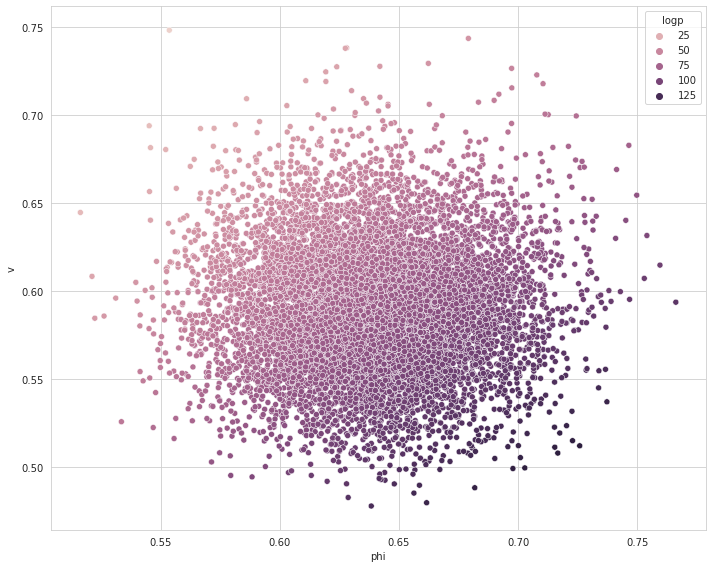

In [152]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(
    data=pd.DataFrame(np.c_[b_sample[:,0], v_sample, logps], columns=['phi','v','logp']),
    x='phi', y='v', hue='logp', ax=ax
)
fig.tight_layout()
fig.show()